# **Netflix Data Exploration Business Case**

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 27.6MB/s]


In [ ]:
netflix = pd.read_csv("netflix.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#Checking null values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Replacing Null values
netflix['director'].fillna("Unknown Director",inplace=True)
netflix['cast'].fillna("Unknown cast",inplace=True)
netflix['country'].fillna("Unknown country",inplace=True)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown cast,Unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

# **Un-nesting the columns**

In [ ]:
#unnesting country column

country_list = netflix['country'].apply(lambda x:x.split(", ")).tolist()
country_new=pd.DataFrame(country_list,index=netflix['show_id']).stack().reset_index().drop(columns='level_1').rename(columns={0:'country_new'})

In [ ]:
#unnesting cast column

cast_list = netflix['cast'].apply(lambda x:x.split(", ")).tolist()
cast_new=pd.DataFrame(cast_list,index=netflix['show_id']).stack().reset_index().drop(columns='level_1').rename(columns={0:'cast_new'})

In [ ]:
#unnesting director column

director_list = netflix['director'].apply(lambda x:x.split(", ")).tolist()
director_new =pd.DataFrame(director_list,index=netflix['show_id']).stack().reset_index().drop(columns='level_1').rename(columns={0:'director_new'})

In [ ]:
#unnesting listed_in column

listed_in_list = netflix['listed_in'].apply(lambda x:x.split(", ")).tolist()
listed_in_new=pd.DataFrame(listed_in_list,index=netflix['show_id']).stack().reset_index().drop(columns='level_1').rename(columns={0:'listed_in_new'})

In [ ]:
netflix_df = netflix.merge(country_new,on=['show_id'],how='left').merge(cast_new,on=['show_id'],how='left').merge(director_new,on=['show_id'],how='left').merge(listed_in_new,on=['show_id'],how='left')


In [ ]:
#drop the unnecessary old columns
netflix_df.drop(['director','cast','country','listed_in'],axis=1,inplace=True)

In [ ]:
netflix_df.head(5)

,show_id,type,title,date_added,release_year,rating,duration,description,country_new,cast_new,director_new,listed_in_new
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown Director,International TV Shows


In [ ]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
date_added       158
release_year       0
rating            67
duration           3
description        0
country_new        0
cast_new           0
director_new       0
listed_in_new      0
dtype: int64

In [ ]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
netflix_df.loc[netflix_df['duration'].isnull(),['duration','rating']]

,duration,rating
126537,NaN,74 min
131603,NaN,84 min
131737,NaN,66 min


In [ ]:
# Here In duration column, it was observed that the nulls had values which were written in corresponding ratings column
# So the duration column nulls are replaced by corresponding values in ratings column

netflix_df.loc[netflix_df['duration'].isnull(),'duration']=netflix_df.loc[netflix_df['duration'].isnull(),'duration'].fillna(netflix_df['rating'])
netflix_df.loc[netflix_df['rating'].str.contains('min',na=False),'rating']='NR'
netflix_df.isnull().sum()

show_id            0
type               0
title              0
date_added       158
release_year       0
rating            67
duration           0
description        0
country_new        0
cast_new           0
director_new       0
listed_in_new      0
dtype: int64

In [ ]:
#Filling the null values of rating with 'NR'
netflix_df['rating'].fillna('NR',inplace=True)
netflix_df.isnull().sum()

show_id            0
type               0
title              0
date_added       158
release_year       0
rating             0
duration           0
description        0
country_new        0
cast_new           0
director_new       0
listed_in_new      0
dtype: int64

In [ ]:
#handling Date added column
for i in netflix_df[netflix_df['date_added'].isnull()]['release_year'].unique():
    imp=netflix_df[netflix_df['release_year']==i]['date_added'].mode().values[0]
    netflix_df.loc[netflix_df['release_year']==i,'date_added']=netflix_df.loc[netflix_df['release_year']==i,'date_added'].fillna(imp)

In [ ]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
date_added       0
release_year     0
rating           0
duration         0
description      0
country_new      0
cast_new         0
director_new     0
listed_in_new    0
dtype: int64

In [ ]:
netflix_df['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [ ]:
netflix_df['duration']=netflix_df['duration'].str.replace(" min","")
netflix_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,country_new,cast_new,director_new,listed_in_new
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown Director,International TV Shows


In [ ]:
netflix_df['duration_copy']=netflix_df['duration'].copy()
netflix_df['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [ ]:
netflix_df.loc[netflix_df['duration_copy'].str.contains('Season'),'duration_copy']=0
netflix_df['duration_copy']=netflix_df['duration_copy'].astype('int')
netflix_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,country_new,cast_new,director_new,listed_in_new,duration_copy
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson,Documentaries,90
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,International TV Shows,0
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Dramas,0
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Mysteries,0
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown Director,International TV Shows,0


In [ ]:
bins1=[-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
netflix_df['duration_copy']=pd.cut(netflix_df['duration_copy'],bins=bins1,labels=labels1)
netflix_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,country_new,cast_new,director_new,listed_in_new,duration_copy
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson,Documentaries,80-100
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,International TV Shows,<1
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Dramas,<1
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Mysteries,<1
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown Director,International TV Shows,<1


In [ ]:
netflix_df.loc[~netflix_df['duration'].str.contains('Season'),'duration']=netflix_df.loc[~netflix_df['duration'].str.contains('Season'),'duration_copy']

In [ ]:
netflix_df.drop(['duration_copy'],axis=1,inplace=True)
netflix_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,country_new,cast_new,director_new,listed_in_new
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown Director,International TV Shows


In [ ]:
netflix_df['duration'].value_counts()

80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [ ]:
netflix_df['date_added']

0         September 25, 2021
1         September 24, 2021
2         September 24, 2021
3         September 24, 2021
4         September 24, 2021
                 ...        
201986         March 2, 2019
201987         March 2, 2019
201988         March 2, 2019
201989         March 2, 2019
201990         March 2, 2019
Name: date_added, Length: 201991, dtype: object

In [ ]:
#date_column into datetime format and splitting the columns of date
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [ ]:
netflix_df['date']=netflix_df['date_added'].dt.day

In [ ]:
netflix_df['month']=netflix_df['date_added'].dt.month

In [ ]:
netflix_df['year']=netflix_df['date_added'].dt.year

In [ ]:
netflix_df['week']=netflix_df['date_added'].dt.week

In [ ]:
netflix_df


,show_id,type,title,date_added,release_year,rating,duration,description,country_new,cast_new,director_new,listed_in_new,date,month,year,week
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,80-100,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson,Documentaries,25,9,2021,38
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,International TV Shows,24,9,2021,38
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Dramas,24,9,2021,38
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown Director,TV Mysteries,24,9,2021,38
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown Director,International TV Shows,24,9,2021,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,100-120,A scrappy but poor boy worms his way into a ty...,India,Anita Shabdish,Mozez Singh,International Movies,2,3,2019,9
201987,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,100-120,A scrappy but poor boy worms his way into a ty...,India,Anita Shabdish,Mozez Singh,Music & Musicals,2,3,2019,9
201988,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,100-120,A scrappy but poor boy worms his way into a ty...,India,Chittaranjan Tripathy,Mozez Singh,Dramas,2,3,2019,9
201989,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,100-120,A scrappy but poor boy worms his way into a ty...,India,Chittaranjan Tripathy,Mozez Singh,International Movies,2,3,2019,9


# **Univariate Analysis**

In [ ]:
#number of distinct titles
df_type = netflix_df.groupby(['type']).agg({"title":"nunique"}).reset_index()
df_type

,type,title
0,Movie,6131
1,TV Show,2676


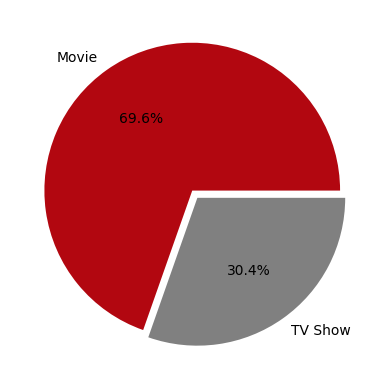

In [ ]:
plt.pie(df_type['title'],explode=(0.03,0.03),labels=df_type['type'],colors=['#b20710','grey'],autopct='%.1f%%')
plt.show()

From the above plot we can observe that Netflix has 70% Movies and 30% TV Show

In [ ]:
#no. of distinct titles on the basis of genre
df_genre = netflix_df.groupby('listed_in_new')['title'].nunique().sort_values(ascending=False).reset_index()
df_genre

,listed_in_new,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


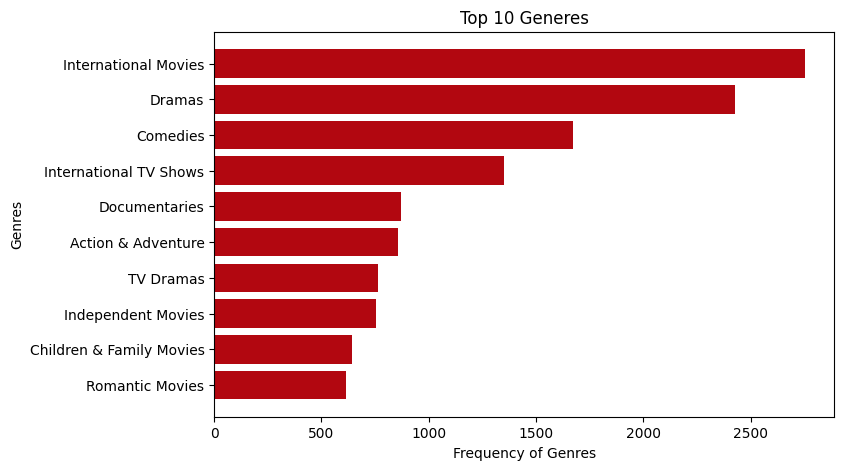

In [ ]:
#Top 10 Generes
plt.figure(figsize=(8,5))
plt.barh(df_genre[9::-1]['listed_in_new'],df_genre[9::-1]['title'],color=['#b20710'])
plt.title('Top 10 Generes')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas and Comedies are the most popular

In [ ]:
#no. of distinct titles on the basis of rating
df_rating = netflix_df.groupby('rating')['title'].nunique().sort_values(ascending=False).reset_index()
df_rating

,rating,title
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,87


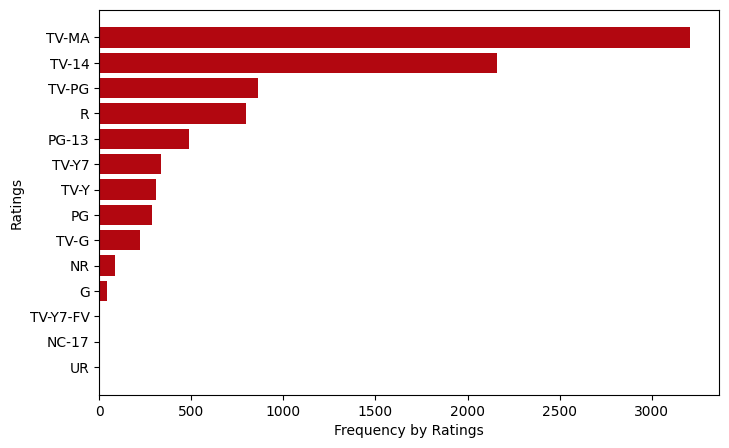

In [ ]:

plt.figure(figsize=(8,5))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'],color=['#b20710'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for audience under 14 and those which require Parental Guidance

In [ ]:
#number of distinct titles on the basis of duration
df_duration = netflix_df.groupby('duration')['title'].nunique().sort_values(ascending=False).reset_index()
df_duration

,duration,title
0,80-100,2222
1,1 Season,1793
2,100-120,1672
3,120-150,897
4,50-80,808
5,2 Seasons,425
6,1-50,287
7,150-200,226
8,3 Seasons,199
9,4 Seasons,95


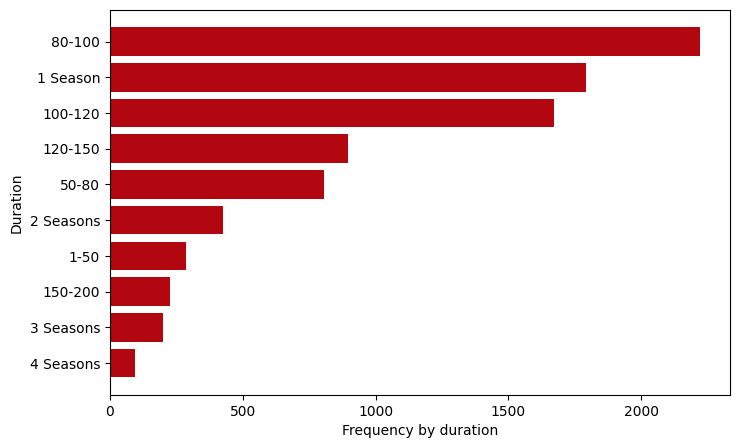

In [ ]:
df_duration=netflix_df.groupby(['duration'])['title'].nunique().sort_values(ascending=False).reset_index()[:10]
plt.figure(figsize=(8,5))
plt.barh(df_duration[::-1]['duration'],df_duration[::-1]['title'],color=['#b20710'])
plt.xlabel('Frequency by duration')
plt.ylabel('Duration')
plt.show()

The duration of Most Watched content in our whole data is 80-100 mins.These must be movies and Shows having only 1 Season.

In [ ]:
#number of distinct titles on the basis of year
df_year = netflix_df.groupby('year')["title"].nunique().reset_index()
df_year

,year,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1189


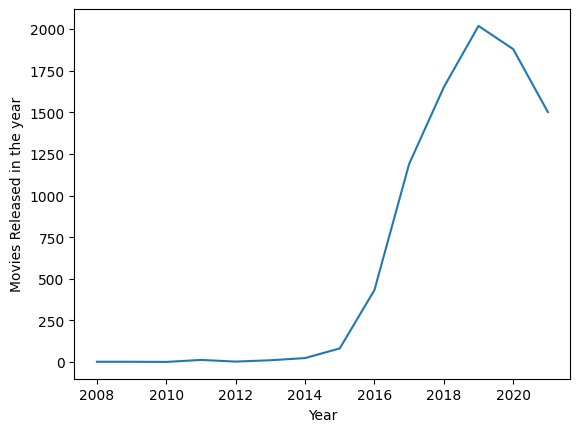

In [ ]:
sns.lineplot(data=df_year,x='year',y='title')
plt.ylabel("Movies Released in the year")
plt.xlabel("Year")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

 **Comparison of TV Shows vs Movies**

In [ ]:
#Top countries with most Movies/TV Shows
df_country = netflix_df.groupby('country_new')["title"].nunique().sort_values(ascending=False).drop('Unknown country').reset_index()[:10]
df_country

,country_new,title
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


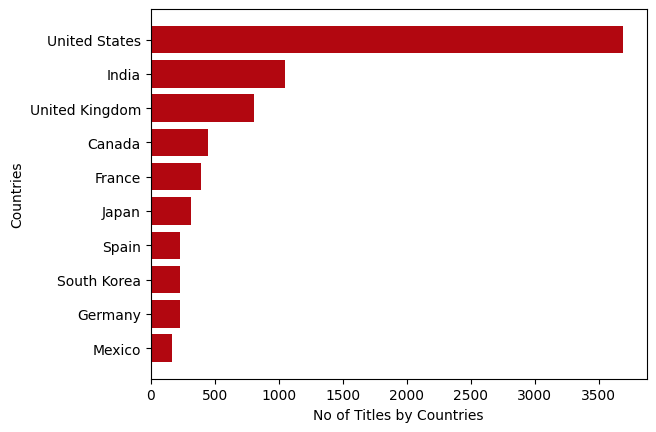

In [ ]:
plt.barh(df_country['country_new'][::-1],df_country['title'][::-1],color=['#b20710'])
plt.xlabel('No of Titles by Countries')
plt.ylabel('Countries')
plt.show()

From the above graph we can say that US,India,UK are leading countries in Content Creation on Netflix

In [ ]:
#Top 10 Movie producing Countries
df_movie_netflix = netflix_df[netflix_df['type']=='Movie']

df_movie = df_movie_netflix.groupby('country_new')['title'].nunique().sort_values(ascending=False).drop('Unknown country').reset_index()[:10]
df_movie

,country_new,title
0,United States,2751
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


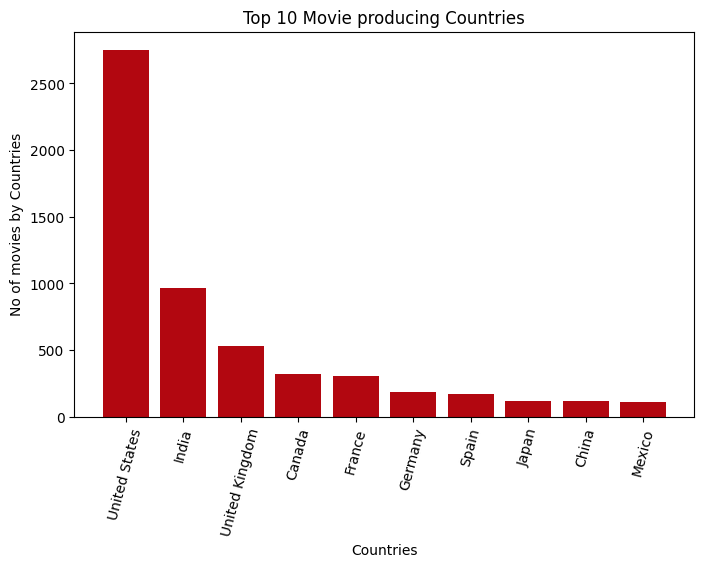

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df_movie['country_new'],df_movie['title'],color = '#b20710')
plt.xticks(rotation=75, fontsize=10)
plt.xlabel('Countries')
plt.ylabel('No of movies by Countries')
plt.title("Top 10 Movie producing Countries")
plt.show()

From the above graph we can say that US,India,UK are leading countries in Movie Content Creation on Netflix

In [ ]:
#Top 10 TV Show producing Countries
df_tv_netflix = netflix_df[netflix_df['type']=='TV Show']

df_tv = df_tv_netflix.groupby('country_new')['title'].nunique().sort_values(ascending=False).drop('Unknown country').reset_index()[:10]
df_tv

,country_new,title
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,66
9,Spain,61


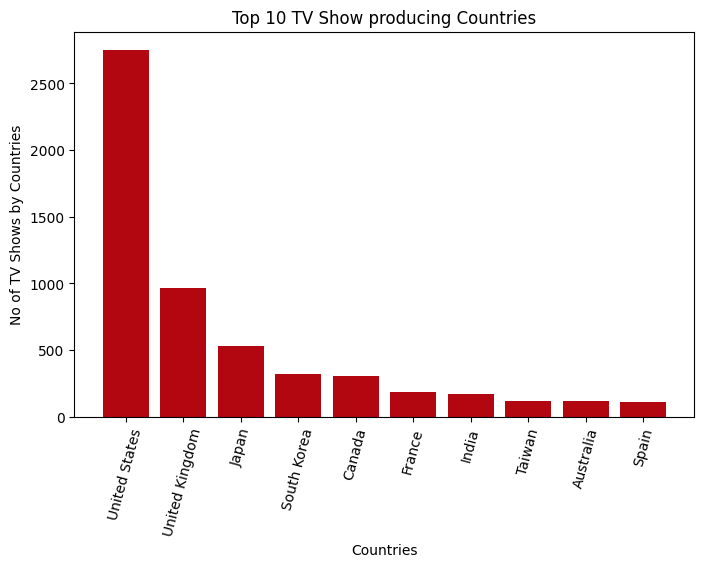

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df_tv['country_new'],df_movie['title'],color = '#b20710')
plt.xticks(rotation=75, fontsize=10)
plt.xlabel('Countries')
plt.ylabel('No of TV Shows by Countries')
plt.title("Top 10 TV Show producing Countries")
plt.show()

From the above graph we can say that US, UK, Japan are leading countries in TV Shows Content Creation on Netflix

**Best Month to launch a Movie/TV Show**

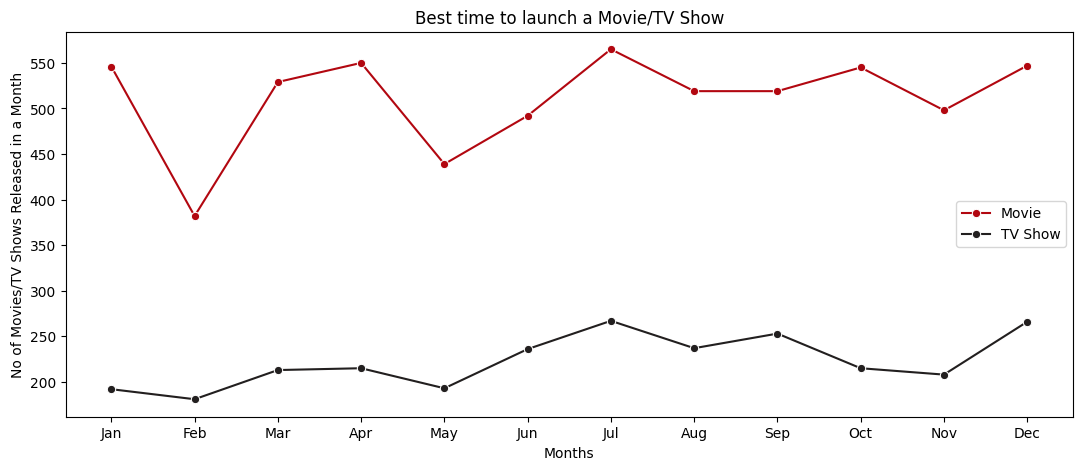

In [ ]:
df_month_movie = df_movie_netflix.groupby('month')['title'].nunique().reset_index()
df_month_tv=df_tv_netflix.groupby('month')['title'].nunique().reset_index()

plt.figure(figsize = (13,5))

sns.lineplot(data=df_month_movie,x='month',y='title',marker='o',color ='#b20710',label = 'Movie')
sns.lineplot(data=df_month_tv,x='month',y='title',marker='o',color ='#221f1f',label = 'TV Show')

plt.title("Best time to launch a Movie/TV Show")
plt.xlabel("Months")
plt.ylabel("No of Movies/TV Shows Released in a Month")

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan', 'Feb','Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()


From the above graph we can observe that mothly upload content of both Tv Shows and movies, shows a similar trend.

The months of Jan,July, October and December record higher
content upload counts, whereas February, May, and November experience comparatively lower counts.

They may choose to release high content in certain months like Dec,Jan which may get more views because of holiday season.



**Best Week to launch a TV show/Movie**

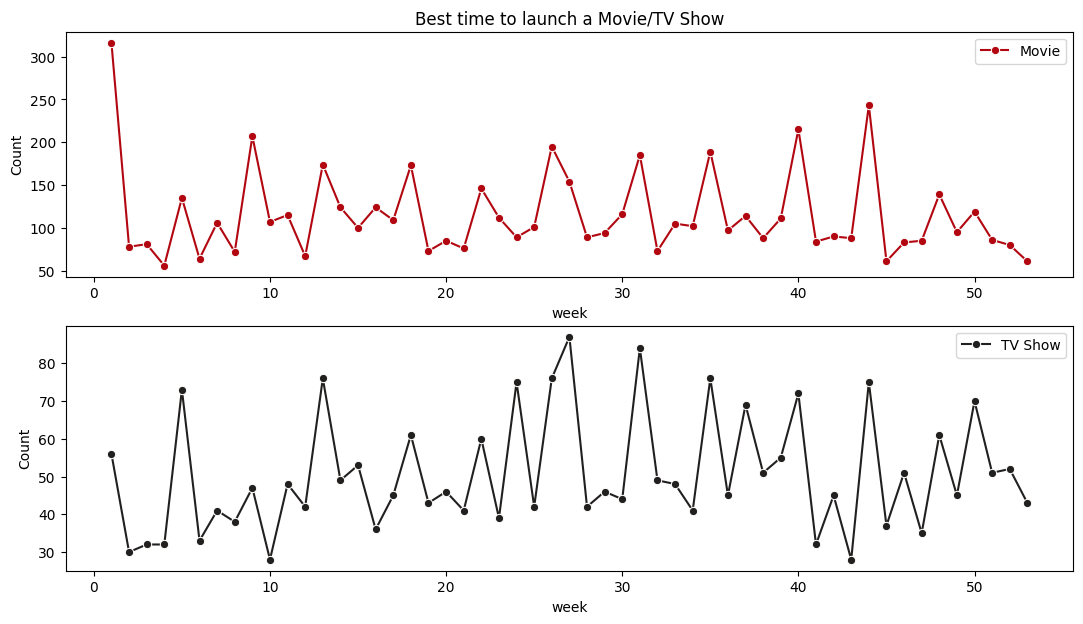

In [ ]:
df_week_movie = df_movie_netflix.groupby('week')['title'].nunique().reset_index()
df_week_tv=df_tv_netflix.groupby('week')['title'].nunique().reset_index()

plt.figure(figsize = (13,7))

plt.subplot(2,1,1)
sns.lineplot(data=df_week_movie,x='week',y='title',marker='o',color ='#b20710',label = 'Movie')
plt.title("Best time to launch a Movie/TV Show")
plt.xlabel("week")
plt.ylabel("Count")

plt.subplot(2,1,2)
sns.lineplot(data=df_week_tv,x='week',y='title',marker='o',color ='#221f1f',label = 'TV Show')
plt.xlabel("week")
plt.ylabel("Count")

plt.show()

The weekly upload count of both Movies and TV shows exhibits a similar trend.

The highest volume of movies are typically uploaded during the initial week of the year.

The highest volume of TV shows tends to be added in the 26th week (around June end)

**Analysis of actors/directors of different types of Tv shows/Movies**

In [ ]:
#Top 10 directors who have appeared in most movies
df_movie_director = df_movie_netflix.groupby('director_new')['title'].nunique().sort_values(ascending=False).drop("Unknown Director").reset_index()[0:10]

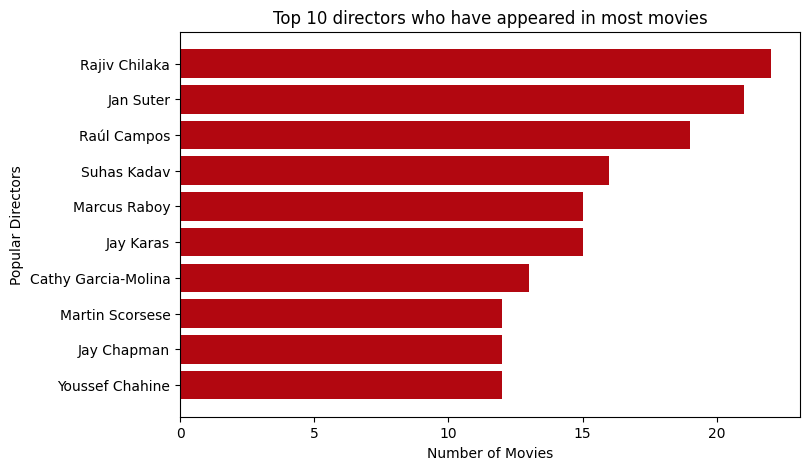

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(df_movie_director[::-1]['director_new'], df_movie_director[::-1]['title'],color=['#b20710'])
plt.title('Top 10 directors who have appeared in most movies')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

In [ ]:
##Top 10 directors who have appeared in most TV shows
df_tv_director = df_tv_netflix.groupby('director_new')['title'].nunique().sort_values(ascending=False).drop("Unknown Director").reset_index()[0:10]

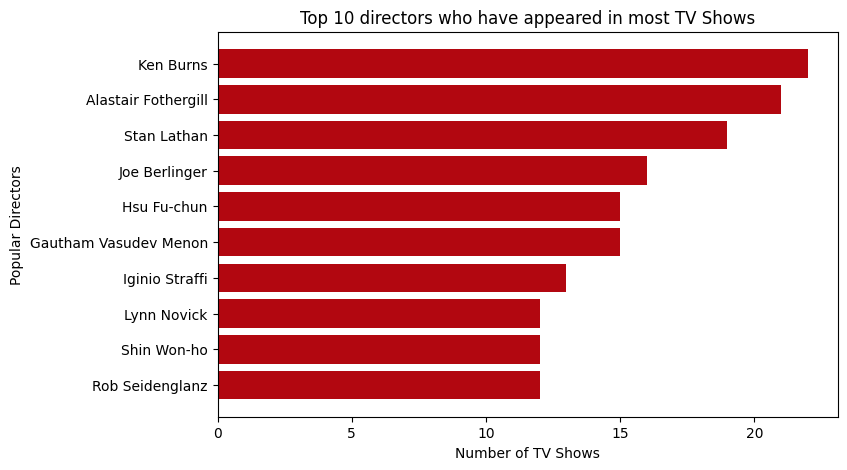

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(df_tv_director[::-1]['director_new'], df_movie_director[::-1]['title'],color=['#b20710'])
plt.title('Top 10 directors who have appeared in most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Popular Directors')
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

In [ ]:
#Top 10 Actors who have appeared in most movies
df_movie_actor = df_movie_netflix.groupby('cast_new')['title'].nunique().sort_values(ascending=False).drop("Unknown cast").reset_index()[0:10]
df_movie_actor

,cast_new,title
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30
5,Paresh Rawal,28
6,Julie Tejwani,28
7,Amitabh Bachchan,28
8,Rupa Bhimani,27
9,Boman Irani,27


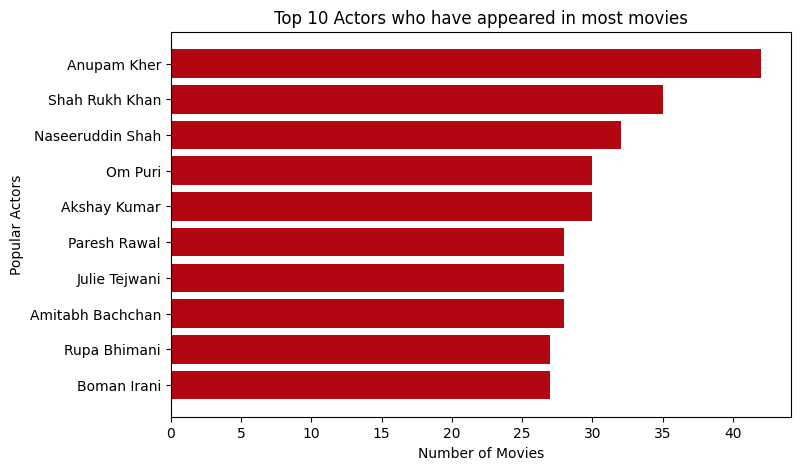

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(df_movie_actor[::-1]['cast_new'], df_movie_actor[::-1]['title'],color=['#b20710'])
plt.title('Top 10 Actors who have appeared in most movies')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

From the above graph bollywood actors such as Anupam Kher, Shah Rukh Khan, Naseeruddin Shah are very much popular across movies on Netflix

In [ ]:
#Top 10 Actors who have appeared in most TV Shows
df_tv_actor = df_tv_netflix.groupby('cast_new')['title'].nunique().sort_values(ascending=False).drop("Unknown cast").reset_index()[0:10]
df_tv_actor

,cast_new,title
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Junichi Suwabe,17
3,Daisuke Ono,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Jun Fukuyama,15
7,Yoshimasa Hosoya,15
8,David Attenborough,14
9,Vincent Tong,13


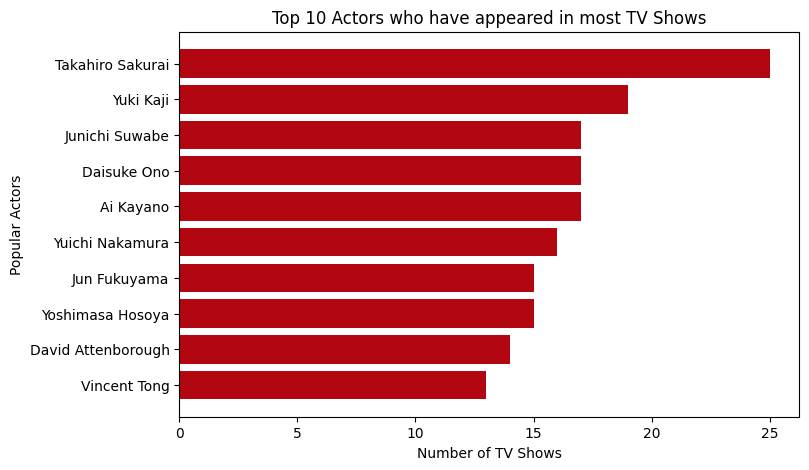

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(df_tv_actor[::-1]['cast_new'], df_tv_actor[::-1]['title'],color=['#b20710'])
plt.title('Top 10 Actors who have appeared in most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Popular Actors')
plt.show()

From the above graph Takahiro Sakurai,Yuki Kaji and other South Korean/Japanese actors are the most popular actors across TV Shows

**Genre movies/TV Shows that are more popular**

In [ ]:
#Top 10 Movie Generes
df_movie_genre = df_movie_netflix.groupby('listed_in_new')['title'].nunique().sort_values(ascending=False).reset_index()[0:10]
df_movie_genre

,listed_in_new,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


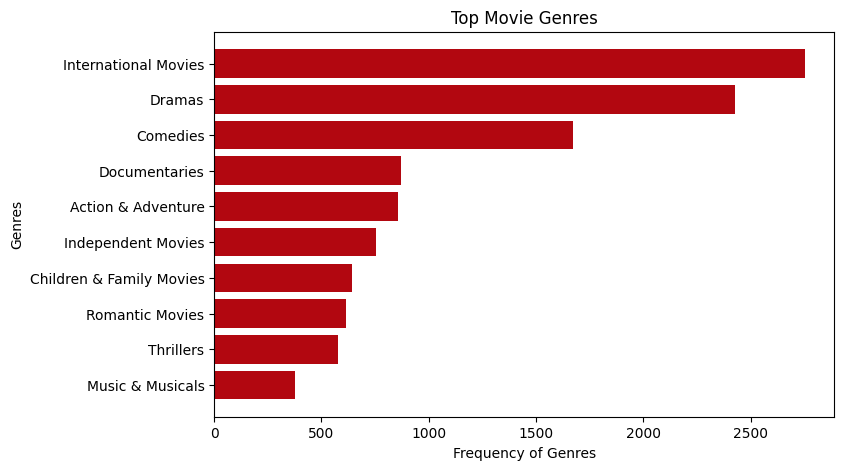

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(df_movie_genre[::-1]['listed_in_new'],df_movie_genre[::-1]['title'],color=['#b20710'])
plt.title('Top Movie Genres')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()



International Movies, Dramas and Comedies are the most popular Movie Genres

In [ ]:
#Top 10 TV Show Generes
df_tv_genre = df_tv_netflix.groupby('listed_in_new')['title'].nunique().sort_values(ascending=False).reset_index()[0:10]
df_tv_genre

,listed_in_new,title
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


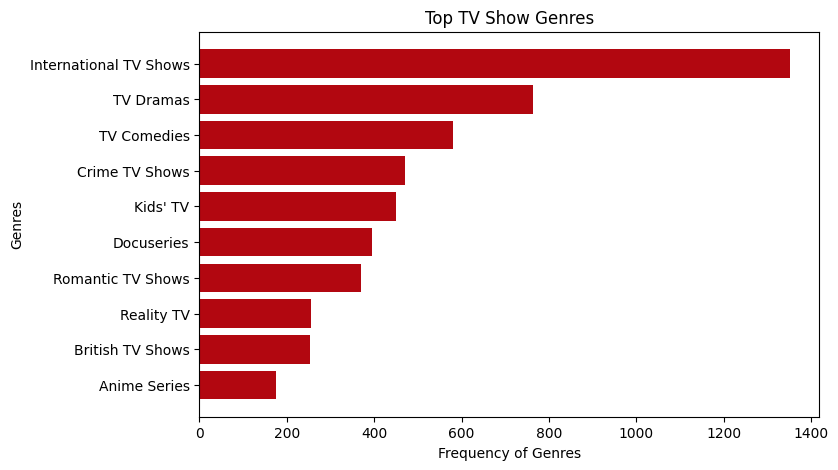

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(df_tv_genre[::-1]['listed_in_new'],df_tv_genre[::-1]['title'],color=['#b20710'])
plt.title('Top TV Show Genres')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International TV Shows,TV Dramas and TV Comedies are the most popular TV Show Genres

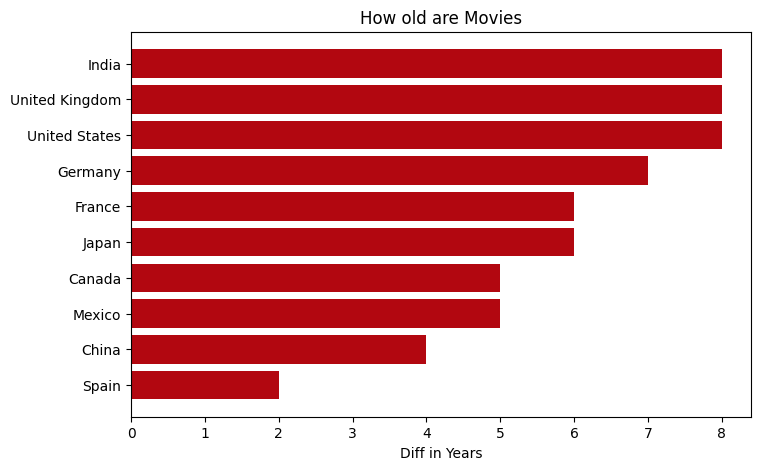

In [ ]:
#Diffrence between Release year and date added
movie_year = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['country_new'].isin(df_movie['country_new']))]
movie_year['diff'] = movie_year['year'] - movie_year['release_year']
movie_year = movie_year.groupby('country_new')['diff'].mean().round().reset_index().sort_values(by = 'diff',ascending = False)

plt.figure(figsize=(8,5))
plt.barh(movie_year[::-1]['country_new'],movie_year[::-1]['diff'],color=['#b20710'])
plt.title('How old are Movies')
plt.xlabel('Diff in Years')
plt.show()

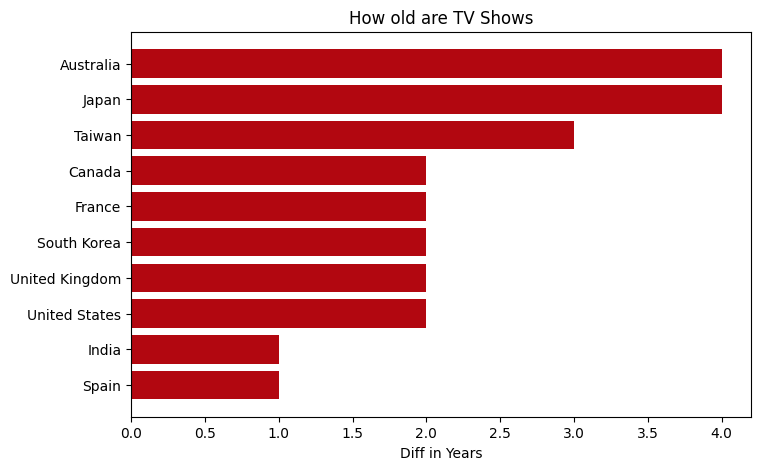

In [ ]:
tv_year = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['country_new'].isin(df_tv['country_new']))]
tv_year['diff'] = tv_year['year'] - tv_year['release_year']
tv_year = tv_year.groupby('country_new')['diff'].mean().round().reset_index().sort_values(by = 'diff',ascending = False)

plt.figure(figsize=(8,5))
plt.barh(tv_year[::-1]['country_new'],tv_year[::-1]['diff'],color=['#b20710'])
plt.title('How old are TV Shows')
plt.xlabel('Diff in Years')
plt.show()

In general, there seems to be a trend of adding movies to Netflix with a longer delay compared to TV shows. This could indicate that viewers might have a higher demand for recent TV shows than movies.

# **Recommendations**

 The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.

 Given the popularity of TV shows in Asian countries, particularly South Korea and Japan, Netflix should increase its investment in producing and acquiring Asian TV
shows.

Given the significant investment in content production in the USA and the emphasis on India, Netflix should continue to focus on these markets.

Focusing on releasing high-quality content during the months of January, July, August, October, and December could lead to increased viewer interest and
engagement as these months have historically seen higher content upload counts, indicating higher demand during those periods.

Recognizing the popularity of shorter TV series, Netflix should continue focusing on producing limited series and shorter season formats. This approach aligns with viewer
preferences for consuming content in manageable episodes.

Given the trend of faster availability of TV shows compared to movies, Netflix could work on acquiring more recent movies and reducing the time lag between their
theatrical release and availability on the platform. This could cater to the audience's preference for up-to-date TV shows and movies.